In [2]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from components import *
%matplotlib widget
from matplotlib.patches import Polygon
#plt.rcParams['figure.figsize'] = (6,3)
from scipy.spatial import ConvexHull
from geometry_elements import Ray3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.lines import Line2D
plt.style.use('classic')

No arguments given, plane at origin with normal (0, 0, 1) initialised! Tread carefully!


interactive(children=(FloatSlider(value=2.25, description='cff', max=10.0, step=0.001), FloatSlider(value=80.0…

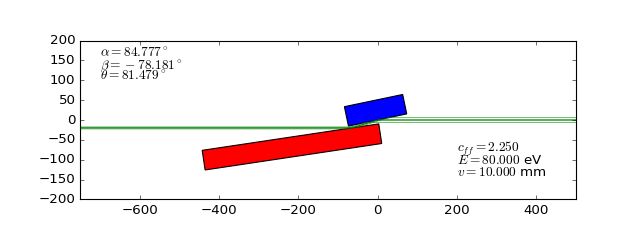

In [4]:
@widgets.interact(
    cff=(0.,10.,0.001),
    energy=(0.,10000.,0.1),
    beam_height=(0.,15.,0.01),
    beam_width=(0.,15.,0.01),
    beam_offset=(-100.,100.,0.01),
    order=(0,10,1),
    grating_length=(0.,400.,0.01),
    grating_width=(0.,400.,0.01),
    grating_height=(0.,400.,0.01),
    graing_line_density=(0.,2000,0.01),
    mirror_length=(0.,500,0.01),
    mirror_width=(0.,500,0.01),
    mirror_height=(0.,500,0.01),
    mirror_voffset=(-100.,100.,0.001),
    mirror_hoffset=(-100.,100.,0.001),
    mirror_axis_voffset=(-100.,100.,0.001),
    mirror_axis_hoffset=(-100.,100.,0.001))

def draw(cff=2.25,
        energy=80,
        beam_height=5,
        beam_width=5,
        order=1,
        grating_length=150,
        grating_width=40,
        grating_height=50, 
        grating_line_density=1100,
        mirror_length=450,
         mirror_width=70,
         mirror_height=50,
         mirror_voffset=20,
         mirror_hoffset=0,
         mirror_axis_hoffset=0,
         mirror_axis_voffset=10,
         beam_offset=-20
):
    grating = Grating(line_density=grating_line_density, 
                      order=order, 
                      cff=cff, 
                      energy=energy,
                      dimensions=np.array([grating_length, grating_width, grating_height]),
                      borders = np.array([3,3,3,3]))
    mirror = Plane_Mirror(voffset=mirror_voffset, 
                          hoffset=mirror_hoffset,
                          axis_hoffset=mirror_axis_hoffset,
                          axis_voffset=mirror_axis_voffset,
                          dimensions=np.array([mirror_length, mirror_width, mirror_height]),
                          borders=np.array([3,3,3,3]))
    pgm = PGM(grating=grating, mirror=mirror)
    pgm.beam_height=beam_height
    pgm.beam_width = beam_width
    pgm.beam_offset = beam_offset
    pgm.grating.compute_angles()
    pgm.mirror.theta = pgm.theta
    pgm.grating.compute_corners()
    pgm.mirror.compute_corners()
    pgm.generate_rays()
    _,_,_= pgm.propagate(pgm.rays)
    fig, ax = plt.subplots(figsize=(8,3))
    ax.set_aspect('equal')
    ax.set_xlim((-750,500))
    ax.set_ylim((-200,200))
    pgm.draw_sideview(ax)
    ax.annotate(fr'$\alpha={pgm.grating.alpha:.3f}^\circ$',(-700,160))
    ax.annotate(fr'$\beta={pgm.grating.beta:.3f}^\circ$',(-700,130))
    ax.annotate(fr'$\theta={pgm.mirror.theta:.3f}^\circ$',(-700,100))
    ax.annotate(fr'$c_{{ff}}={pgm.grating.cff:.3f}$',(200,-80))
    ax.annotate(fr'$E={pgm.grating.energy:.3f}$ eV',(200,-110))
    ax.annotate(fr'$v={pgm.mirror.axis_voffset:.3f}$ mm',(200,-140))

    fig.show()
    